
# Decision tree (classification) algorithm
---
- **Traininig**:
    1. Find most *informative* combination of `node of the tree`,  `feature`, and  `split value`
    2. Do split if `max_depth` is not reached
    3. Iterate over 1-2.
    
    
- **Inference** (prediction):
    - Follow the rules ^_^.
    

## Decision tree example

![](fancy_tree.png)

picture link https://yadi.sk/i/fKgXgTdruFVMng

---

## Probabilities (sample means)

> Before the first split:

$$P(y=\text{BLUE}) = \frac{9}{20} = 0.45$$

$$P(y=\text{YELLOW}) = \frac{11}{20} = 0.55$$

> After the first split:

$$P(y=\text{BLUE}|X\leq 12) = \frac{8}{13} \approx 0.62$$
$$P(y=\text{BLUE}|X> 12) = \frac{1}{7} \approx 0.14$$

$$P(y=\text{YELLOW}|X\leq 12) = \frac{5}{13} \approx 0.38$$
$$P(y=\text{YELLOW}|X > 12) = \frac{6}{7} \approx 0.86$$


---

## Entropy

$$
H(p) = - \sum_i^K p_i\log(p_i)
$$


> Before the first split

$$H = - 0.45 \log 0.45 - 0.55 \log 0.55 \approx -0.69 $$

> After the first split

$$H_{\text{left}} = - 0.62 \log 0.62 - 0.38 \log 0.38 \approx -0.66$$

$$H_{\text{right}} = - 0.14 \log 0.14 - 0.86 \log 0.86 \approx -0.40$$

$$H_{\text{total}} =  - \frac{13}{20} 0.66 - \frac{7}{20} 0.40 \approx -0.86$$

## Information Gain
$$
IG = H(\text{parent}) - H(\text{child})
$$


$$IG = -0.69 - (-0.86) = 0.13$$

In [ ]:
p1 + p2 = 1

f(p1, p2) ---> max p1=p2=0.5
монотонно и симметрично
f(p1, p2) ---> min p1=1,p2=0 or p1=0,p2=1


-sum(p_i**2)

In [2]:
# !pip install -q kaggle
!kaggle competitions download -c forest-cover-type-prediction
!unzip forest-cover-type-prediction.zip -d forest-cover-type-prediction

 75%|████████████████████████████▌         | 19.0M/25.3M [00:00<00:00, 30.1MB/s]
100%|██████████████████████████████████████| 25.3M/25.3M [00:00<00:00, 37.4MB/s]
Archive:  forest-cover-type-prediction.zip
  inflating: forest-cover-type-prediction/sampleSubmission.csv  
  inflating: forest-cover-type-prediction/sampleSubmission.csv.zip  
  inflating: forest-cover-type-prediction/test.csv  
  inflating: forest-cover-type-prediction/test.csv.zip  
  inflating: forest-cover-type-prediction/test3.csv  
  inflating: forest-cover-type-prediction/train.csv  
  inflating: forest-cover-type-prediction/train.csv.zip  


# Kaggle's 'Forest Cover Type Prediction' competition

Read in the data as pandas dataframes. Data was downloaded as csv files from the Kaggle competition Data page https://www.kaggle.com/c/forest-cover-type-prediction/data.

> You could install kaggle package https://github.com/Kaggle/kaggle-api and obtain this dataset by `kaggle competitions download -c forest-cover-type-prediction`

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./forest-cover-type-prediction/train.csv', index_col=0)

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df.shape

(15120, 55)

In [7]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [8]:
df.Cover_Type.value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

In [9]:
df.count()

Elevation                             15120
Aspect                                15120
Slope                                 15120
Horizontal_Distance_To_Hydrology      15120
Vertical_Distance_To_Hydrology        15120
Horizontal_Distance_To_Roadways       15120
Hillshade_9am                         15120
Hillshade_Noon                        15120
Hillshade_3pm                         15120
Horizontal_Distance_To_Fire_Points    15120
Wilderness_Area1                      15120
Wilderness_Area2                      15120
Wilderness_Area3                      15120
Wilderness_Area4                      15120
Soil_Type1                            15120
Soil_Type2                            15120
Soil_Type3                            15120
Soil_Type4                            15120
Soil_Type5                            15120
Soil_Type6                            15120
Soil_Type7                            15120
Soil_Type8                            15120
Soil_Type9                      

# Split data

In [10]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Cover_Type', axis=1),
                                                    df.Cover_Type, train_size=.80, random_state=1)

In [ ]:
- sum p*log(p)

In [12]:
import matplotlib.pyplot as plt

In [19]:
p = np.linspace(0+1e-6,1-1e-6,1000)
y = -(p*np.log2(p)+(1-p)*np.log2(1-p))
y2 = -(p**2+(1-p)**2)

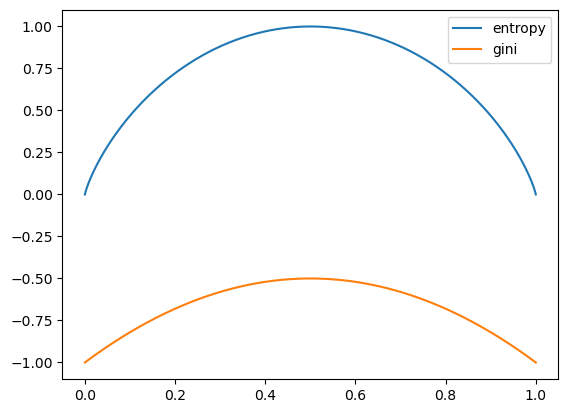

In [21]:
plt.plot(p, y, label='entropy')
plt.plot(p, y2, label='gini')
plt.legend();

In [ ]:
clf = DecisionTreeClassifier()

params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 30),
    'min_samples_split': np.arange(10, 30, 5)
}

cv = KFold(n_splits=5, shuffle=True, random_state=5)

In [ ]:
gs = GridSearchCV(clf, param_grid=params_grid, cv=cv, n_jobs=-1, verbose=1)

gs.fit(X_train, y_train)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = gs.predict(X_test)

accuracy_score(y_test, y_pred)

# Public test (we do not have labels for them)

In [ ]:
test = pd.read_csv('./forest-cover-type-prediction/test.csv', index_col=0)

In [ ]:
gs.best_estimator_.fit(df.drop('Cover_Type', axis=1), df.Cover_Type)

In [ ]:
y_pred_leaderboard = gs.predict(test)

In [ ]:
predictions = pd.DataFrame(data=y_pred_leaderboard,
                           index=test.index, 
                           columns=['Cover_Type'])
predictions.to_csv('decision_tree.csv')

In [ ]:
# !kaggle competitions submit -c forest-cover-type-prediction -f decision_tree.csv -m "{'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 10}"

In [ ]:
y_test.value_counts()

In [ ]:
predictions.Cover_Type.value_counts()

# Useful links


- All parameters of a DecisionTreeClassifier explained https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680 
